In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("../imori.jpg")
img_noise = cv2.imread("../imori_noise.jpg")
img_dark = cv2.imread("../imori_dark.jpg")

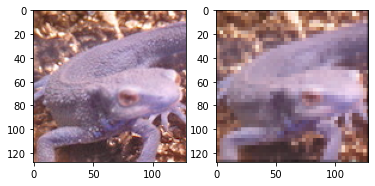

In [34]:
# Q11 均值滤波器
def meanFilter(img):
    
    # 0 填充 
    h,w = img.shape[:2]
    new_shape = []
    if h % 3 != 0:
        new_shape.append((h//3 +1) * 3)
    else:
        new_shape.append(h)
    if w % 3 != 0:
        new_shape.append((w//3 +1) * 3)
    else:
        new_shape.append(w)
    new_shape.append(3)
    
    new_img = np.zeros(new_shape, dtype=int)
    new_img[:h, :w, :] = img
    
    # 滤波
    i = 1
    while(i < h):
        j = 1
        while(j < w):
            for k in range(3):
                new_img[i-1:i+2, j-1:j+2, k] = np.sum(new_img[i-1:i+2, j-1:j+2, k])//9
            j += 3
        i += 3
    
    return new_img[:h,:w,:]

img11 = meanFilter(img)

# save and display
cv2.imwrite("../answer_img_python/answer_img11.jpg", img11)
plt.figure()
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img11)

In [36]:
# Q12 Motion Filter
# 右向斜对角线求均值

def motionFilter(img):
   
    # 0 填充 
    h,w = img.shape[:2]
    new_shape = []
    if h % 3 != 0:
        new_shape.append((h//3 +1) * 3)
    else:
        new_shape.append(h)
    if w % 3 != 0:
        new_shape.append((w//3 +1) * 3)
    else:
        new_shape.append(w)
    new_shape.append(3)
    
    new_img = np.zeros(new_shape, dtype=int)
    new_img[:h, :w, :] = img
    
    # 滤波
    i = 1
    while(i < h):
        j = 1
        while(j < w):   
            for k in range(3): #  必需  3通道的循环
                new_img[i-1:i+2, j-1:j+2, k] = np.sum([new_img[i-1,j-1,k],new_img[i,j,k],new_img[i+1,j+1,k]] )//3
            j += 3
        i += 3
    
    return new_img[:h,:w]

img12 = motionFilter(img)

# save and display
cv2.imwrite("../answer_img_python/answer_img12.jpg", img12)
plt.figure()
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img12)

In [37]:
# MAX-MIN滤波器
# 常用于边缘检测 (灰度图)

def max_minFilter(img):   # 3x3
    # 转为灰度图
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 0 填充 
    h,w = img.shape[:2]
    new_shape = []
    if h % 3 != 0:
        new_shape.append((h//3 +1) * 3)
    else:
        new_shape.append(h)
    if w % 3 != 0:
        new_shape.append((w//3 +1) * 3)
    else:
        new_shape.append(w)
    
    new_img = np.zeros(new_shape, dtype=int)
    new_img[:h, :w] = gray_img 
    
    # 滤波
    i = 1
    while(i < h):
        j = 1
        while(j < w):   
            img_slice = new_img[i-1:i+2, j-1:j+2]
            new_img[i-1:i+2, j-1:j+2] = np.max(img_slice) - np.min(img_slice)
            j += 3
        i += 3
    
    return new_img[:h,:w]

img13 = max_minFilter(img)

# save and display
cv2.imwrite("../answer_img_python/answer_img13.jpg", img13)
plt.figure()
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img13)


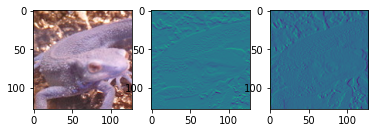

In [47]:
# Q.14. 微分滤波器

def differentialFilter(img, orient):
    # 转为灰度图
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 0 填充 
    h,w = img.shape[:2]
    new_shape = [h+2,w+2]
    
    new_img = np.zeros(new_shape, dtype=int)
    return_img = np.zeros(new_shape, dtype = int)
    new_img[1:h+1, 1:w+1] = gray_img 
    
    # 滤波
    i = 1
    while(i < h+2):
        j = 1
        while(j < w+2):   
            if orient == 0:  # 纵向
                return_img[i,j] = new_img[i,j] - new_img[i-1,j]
            if orient == 1:  # 横向 
                return_img[i,j] = new_img[i,j] - new_img[i,j-1]
            j += 1
        i += 1
    
    return return_img[1:h+1,1:w+1]
    
img14_v = differentialFilter(img,0)
img14_h = differentialFilter(img,1)
# save and display
cv2.imwrite("../answer_img_python/answer_img14_v.jpg", img14_v)
cv2.imwrite("../answer_img_python/answer_img14_h.jpg", img14_h)
plt.figure()
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(img14_v)
plt.subplot(133)
plt.imshow(img14_h)

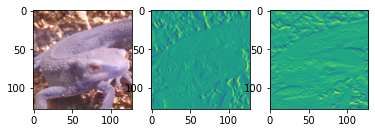

In [57]:
# Q.15. Sobel滤波器
def sobelFilter(img, orient):
    # 转为灰度图
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 0 填充 
    h,w = img.shape[:2]
    new_shape = [h+2,w+2]
    
    new_img = np.zeros(new_shape, dtype=int)
    return_img = np.zeros(new_shape, dtype = int)
    new_img[1:h+1, 1:w+1] = gray_img 
    
    # 滤波
    i = 1
    while(i < h):
        j = 1
        while(j < w):   
            if orient == 0:  # 纵向
                return_img[i,j] = np.sum(np.multiply(new_img[i-1:i+2,j-1:j+2],[[1,0,-1],[2,0,-2],[1,0,-1]]))
            if orient == 1:  # 横向 
                return_img[i,j] = np.sum(np.multiply(new_img[i-1:i+2,j-1:j+2],[[1,2,1],[0,0,0],[-1,-2,-1]]))
            j += 1
        i += 1
    
    return return_img[1:h+1, 1:w+1]
    
img15_v = sobelFilter(img,0)
img15_h = sobelFilter(img,1)

# save and display
cv2.imwrite("../answer_img_python/answer_img15_v.jpg", img15_v)
cv2.imwrite("../answer_img_python/answer_img15_h.jpg", img15_h)
plt.figure()
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(img15_v)
plt.subplot(133)
plt.imshow(img15_h)

In [59]:
# Q.16. Prewitt滤波器
def prewittFilter(img, orient):
    # 转为灰度图
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 0 填充 
    h,w = img.shape[:2]
    new_shape = [h+2,w+2]
    
    new_img = np.zeros(new_shape, dtype=int)
    return_img = np.zeros(new_shape, dtype = int)
    new_img[1:h+1, 1:w+1] = gray_img 
    
    # 滤波
    i = 1
    while(i < h):
        j = 1
        while(j < w):   
            if orient == 0:  # 纵向
                return_img[i,j] = np.sum(np.multiply(new_img[i-1:i+2,j-1:j+2],[[-1,-1,-1],[0,0,0],[1,1,1]]))
            if orient == 1:  # 横向 
                return_img[i,j] = np.sum(np.multiply(new_img[i-1:i+2,j-1:j+2],[[-1,0,1],[-1,0,1],[-1,0,1]]))
            j += 1
        i += 1
    
    return return_img[1:h+1, 1:w+1]
    
img16_v = prewittFilter(img,0)
img16_h = prewittFilter(img,1)

# save and display
cv2.imwrite("../answer_img_python/answer_img16_v.jpg", img16_v)
cv2.imwrite("../answer_img_python/answer_img16_h.jpg", img16_h)
plt.figure()
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(img16_v)
plt.subplot(133)
plt.imshow(img16_h)

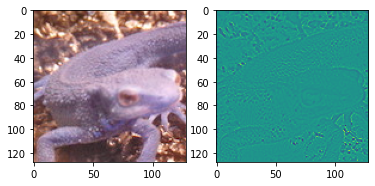

In [65]:
# Q.17. Laplacian滤波器
def laplacianFilter(img):
    # 转为灰度图
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 0 填充 
    h,w = img.shape[:2]
    new_shape = [h+2,w+2]
    
    new_img = np.zeros(new_shape, dtype=int)
    return_img = np.zeros(new_shape, dtype = int)
    new_img[1:h+1, 1:w+1] = gray_img 
    
     
    # 滤波
    i = 1
    while(i < h):
        j = 1
        while(j < w):   
            return_img[i,j] = np.sum(np.multiply(new_img[i-1:i+2,j-1:j+2],[[0,1,0],[1,-4,1],[0,1,0]]))
            j += 1
        i += 1
    
    return return_img[1:h+1, 1:w+1]
    
img17 = laplacianFilter(img)

# save and display
cv2.imwrite("../answer_img_python/answer_img17.jpg", img17)
plt.figure()
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img17)


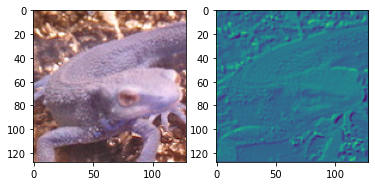

In [64]:
# Q.18. Emboss滤波器
def embossFilter(img):
    # 转为灰度图
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 0 填充 
    h,w = img.shape[:2]
    new_shape = [h+2,w+2]
    
    new_img = np.zeros(new_shape, dtype=int)
    return_img = np.zeros(new_shape, dtype = int)
    new_img[1:h+1, 1:w+1] = gray_img 
    
     
    # 滤波
    i = 1
    while(i < h):
        j = 1
        while(j < w):   
            return_img[i,j] = np.sum(np.multiply(new_img[i-1:i+2,j-1:j+2],[[-2,-1,0],[-1,1,1],[0,1,2]]))
            j += 1
        i += 1
    
    return return_img[1:h+1, 1:w+1]
    
img18 = embossFilter(img)

# save and display
cv2.imwrite("../answer_img_python/answer_img18.jpg", img18)
plt.figure()
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img18)


In [66]:
# Q.19. LoG滤波器

def gaussianFilter(img_noise):
    new_img = np.zeros(img_noise.shape, dtype=int)  # [0..1] for floats or [0..255] for integers
    
    # 填充
    h,w = img_noise.shape[:2]
    padding_img = np.zeros([h+1,w+1,3])
    padding_img[:h,:w,:] = img_noise[:,:,:]
    
    # 高斯滤波
    i = 1 
    while(i < h):
        j = 1
        while(j < w):
            for k in range(3):
                v = np.sum(padding_img[i-1:i+2, j-1:j+2, k] * [[1,2,1],[2,4,2],[1,2,1]]//16)
                padding_img[i-1:i+2, j-1:j+2, k] = v
            j += 3
        i += 3
        
    new_img[:,:,:] = padding_img[:h, :w, :]
    
    return new_img

def logFilter(img_noise):
    
    # 高斯滤波去噪
    img_1 = gaussianFilter(img_noise)
    
    # 转为灰度图
    gray_img = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
     
    # LoG滤波
    h,w = gray_img.shape[:2]
    for i in range(h):
        for j in range(w):   
            gray_img[i,j] = () / () * exp(-() /())
    
    return gray_img
 
img19 = loGFilter(img_noise)

# save and display
cv2.imwrite("../answer_img_python/answer_img19.jpg", img19)
plt.figure()
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img19)


SyntaxError: invalid syntax (<ipython-input-66-afa6acbcf15e>, line 38)

In [2]:
# Q.20. 直方图
def img_hist(img):
    
    # 转为灰度图
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 绘图
    plt.figure()
    plt.hist(gray_img.ravel(),256)
    plt.savefig("../answer_img_python/answer_img20.png")
    plt.show()

img_hist(img_dark)